# A Review of Amazon's Bestselling Books (2009-2019)
## By Stephanie Netoafomachukwu Anyama.

 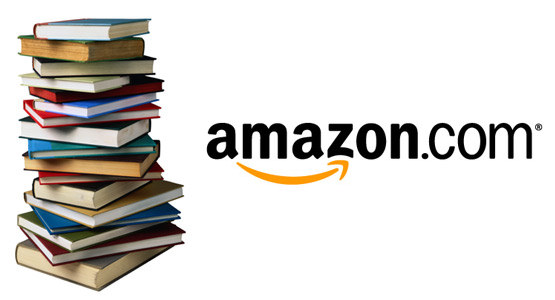

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#inferences">Inferences</a></li>
<li><a href="#conclusion">Conclusion</a></li>
<li><a href="#references">References</a></li>
</ul>


<a id='intro'></a>
## Introduction.
If you’re a voracious pleasure reader, you will agree – and probably nod with a wide smile – that nothing really compares to the feeling of turning pages of a printed book. Collecting books is every reader’s pride, and to this end, Amazon has made this possible and affordable. Amazon is the largest online marketplace for print books worldwide. The company controls the majority of the print book market, with the estimates that the company’s share in the market will only grow in the future. It is said that in the USA alone, Amazon sells a whopping _300 million copies_ per year. Each year, certain books are the most purchased and enjoyed by customers.

In this project, I took up the challenge of finding out what factors guided the purchase of the most popular books, ranging from price point to cover type, with everything in between. So, get comfortable, as you would if you were with your favourite book, and read this review.

#### Dataset Features.
1. price: The retail price for the item on Amazon.
2. ranks: The rank of the book in its bestsellers list for its year.
3. title: The title of the book.
4. average_rating: The average rating given to each book on a scale of 1-5.
5. no_of_reviews: The number of reviews posted by readers and customers on Amazon.
6. author: The name of the author.
7. cover type: The type of cover used for each book, such as Hardback, Paperback etc. 
8. year: The year the book made the bestsellers' list.
9. genre: The genre of each book which could either be fiction or non-fiction.

<a id='wrangling'></a>
## Data Wrangling

### Gathering
To gather the data, I scraped information using `BeautifulSoup`, `selenium` and Chrome's Selenium webdriver. I installed and imported these libraries as required, and others like `pandas`, `matplotlib` and `seaborn` for wrangling and visualization. To create the word cloud containing the most frequently used words, I used the `nltk`, `wordcloud` and `PIL` libraries. I also used the `random` library to create the function needed to generate the orange colour for the Word CLoud.

In [268]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager 
from selenium.webdriver.chrome.service import Service as ChromeService
from urllib.request import urlopen
from time import sleep

# for word cloud creation
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import random
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
pd.set_option('display.width',1000)

_Time for scraping._

> It is important to note that 2020 was added to the list because the scraped data capped at the penultimate year, 2019.

In [14]:
#since the first page and last page has the same pattern url for all the years 
urls =[]
years = [str(i) for i in range(2009,2020)] #list of years between 2009-2020
for year in years:
    urls.append (f"https://www.amazon.com/gp/bestsellers/{year}/books")
    urls.append(f"https://www.amazon.com/gp/bestsellers/{year}/books/ref=zg_bsar_pg_2/ref=zg_bsar_pg_2?ie=UTF8&pg=2")

In [4]:
def get_dir(book,year): 
    '''to get the details of each book for each year''' 
    
    import numpy as np
    '''to get the name of price'''

    try:
        price = book.find('span',class_="_cDEzb_p13n-sc-price_3mJ9Z").text[1:]
    except Exception as e:
        price = np.nan
    try:
        ranks = book.find('span', class_='zg-bdg-text').text[1:]
    except Exception as e:
        ranks = np.nan
    try:
        title = book.find('div',class_="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y").text
    except Exception as e:
        title = np.nan
    try:
        ratings= book.find('span',class_="a-icon-alt").text[:3] 
    except Exception as e:
        ratings = np.nan
    try:
        no_of_reviews  = book.find('span',class_="a-size-small").text
    except Exception as e:
        no_of_reviews = np.nan
    try:
        author = book.find('a',class_="a-size-small a-link-child").text
    except Exception as e:
        author = np.nan
    try:
        cover_type = book.find('span',class_="a-size-small a-color-secondary a-text-normal").text
    except Exception as e:
        cover_type = np.nan
    year = year
    return [price,ranks,title,ratings,no_of_reviews,author,cover_type, year]

In [15]:
year = [(str(i),str(i)) for i in range(2009,2020)] #create list that contains a set of each year
years = [j for i in year for j in i] #get a list from the above line
#years

In [16]:
all_year = [] #Empty list of the content on the first and second page for the all the years of interest
from time import sleep 
for url in urls:  # loop through the urls created in cell 2
    
    website = url 
    
    driver = webdriver.Chrome("C:/Users/netoa/Downloads/chromedriver_win32/chromedriver.exe") #to load the selenium webdriver 
    
    driver.get(website)        # use selenium webdriver above to get the webpage
    
    sleep(30)                  #to make sure the website is fullly loaded before going to the next page
    
    the_soup = BeautifulSoup(driver.page_source, 'html.parser')           #to get the page content
    
    books = the_soup.find_all(id = 'gridItemRoot')                 #get every books on the page.
    
    all_year.append(books) #add the books to the the list above
    
    
    
    driver.quit()                      #to close the chrome windows tab after extracting the data
    
#

In [17]:
year_index = (list(enumerate(years)))
dc = year_index

In [18]:
dc

[(0, '2009'),
 (1, '2009'),
 (2, '2010'),
 (3, '2010'),
 (4, '2011'),
 (5, '2011'),
 (6, '2012'),
 (7, '2012'),
 (8, '2013'),
 (9, '2013'),
 (10, '2014'),
 (11, '2014'),
 (12, '2015'),
 (13, '2015'),
 (14, '2016'),
 (15, '2016'),
 (16, '2017'),
 (17, '2017'),
 (18, '2018'),
 (19, '2018'),
 (20, '2019'),
 (21, '2019')]

In [19]:
data = [] #create an empty list for the observation for all the books in the top 100 for every year with the period of 2009-2022
for i in dc:   #loop through the year index in the cell above
    for books in all_year[i[0]]:             #loop through the books for all the years
        for book in books:                   #loop through the books for on each page
            data.append(get_dir(book,i[1]))  # get the details of each book and add to data(line 1)
            
#data #to print the data collected

In [20]:
# open file
with open('Amazon.txt', 'w+') as f:
     
    # write elements of list
    for items in data: 
        try:
            f.write('%s\n' %items)
        except Exception as e:
            f.write('%s\n' 'nothing')
     
    print("Success")
 
 
# close the file
f.close()

Success


In [21]:
best_sellers= pd.DataFrame(data, columns = ['price','ranks','title','no_of_reviews','ratings',
                                                  'author','cover_type','year'])

In [22]:
best_sellers

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year
0,17.00,1,The Lost Symbol,4.3,"28,371",Dan Brown,Hardcover,2009
1,10.43,2,The Shack: Where Tragedy Confronts Eternity,4.6,"40,920",William P. Young,Paperback,2009
2,16.37,3,Liberty and Tyranny: A Conservative Manifesto,4.8,"5,305",Mark R. Levin,Hardcover,2009
3,16.41,4,"Breaking Dawn (The Twilight Saga, Book 4)",4.7,"24,891",Stephenie Meyer,Hardcover,2009
4,10.00,5,Going Rogue: An American Life,4.6,"1,599",Sarah Palin,Hardcover,2009
5,20.96,6,StrengthsFinder 2.0,4.1,Gallup,NaN,Hardcover,2009
6,15.94,7,The Help,4.7,"32,353",Kathryn Stockett,Hardcover,2009
7,19.91,8,New Moon (The Twilight Saga),4.6,"20,381",Stephenie Meyer,Paperback,2009
8,69.99,9,The Twilight Saga Collection,4.7,"6,835",Stephenie Meyer,Hardcover,2009
9,15.69,10,Outliers: The Story of Success,4.6,"35,359",Malcolm Gladwell,Hardcover,2009


In [24]:
best_sellers.shape

(660, 8)

#### Saving the Gathered Dataset

In [25]:
best_sellers.to_csv('best_sellers.csv')

At the end of my gathering process, I obtained 660 entries from Amazon, with 8 features. However, I didn't get information concerning their genres. To solve this, I used a solution drawn from [here](https://github.com/Chisomnwa/Amazon-Best-Selling-Books-Analysis/blob/main/Part_1_Amazon_Web_Scrapping.ipynb) to fix it.
### Assessment
I carried out visual and programmatic assessments of my dataset to find any quality or tidiness issues that may interfere with my analysis. 

In [36]:
df = pd.read_excel('/Users/netoa/Downloads/best_sellers.xlsx', index_col=[0])
df

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
0,17.00,1,The Lost Symbol,4.3,28371,Dan Brown,Hardcover,2009,Fiction
1,10.43,2,The Shack: Where Tragedy Confronts Eternity,4.6,40920,William P. Young,Paperback,2009,Fiction
2,16.37,3,Liberty and Tyranny: A Conservative Manifesto,4.8,5305,Mark R. Levin,Hardcover,2009,Non Fiction
3,16.41,4,"Breaking Dawn (The Twilight Saga, Book 4)",4.7,24891,Stephenie Meyer,Hardcover,2009,Fiction
4,10.00,5,Going Rogue: An American Life,4.6,1599,Sarah Palin,Hardcover,2009,Non Fiction
5,20.96,6,StrengthsFinder 2.0,4.1,Gallup,NaN,Hardcover,2009,Non Fiction
6,15.94,7,The Help,4.7,32353,Kathryn Stockett,Hardcover,2009,Fiction
7,19.91,8,New Moon (The Twilight Saga),4.6,20381,Stephenie Meyer,Paperback,2009,Fiction
8,69.99,9,The Twilight Saga Collection,4.7,6835,Stephenie Meyer,Hardcover,2009,Fiction
9,15.69,10,Outliers: The Story of Success,4.6,35359,Malcolm Gladwell,Hardcover,2009,Non Fiction


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 659
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          630 non-null    float64
 1   ranks          660 non-null    int64  
 2   title          658 non-null    object 
 3   no_of_reviews  660 non-null    float64
 4   ratings        660 non-null    object 
 5   author         562 non-null    object 
 6   cover_type     659 non-null    object 
 7   year           660 non-null    int64  
 8   genre          660 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 51.6+ KB


In [38]:
df.isnull().sum()

price            30
ranks             0
title             2
no_of_reviews     0
ratings           0
author           98
cover_type        1
year              0
genre             0
dtype: int64

In [39]:
df[df.price.isnull()]

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
16,NaN,17,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",4.6,14540,Jeff Kinney,Hardcover,2009,Fiction
52,NaN,73,The Official SAT Study Guide: For the New SAT ...,4.5,The College Board,NaN,Paperback,2009,Non Fiction
55,NaN,76,The Official SAT Study Guide,4.4,The College Board,NaN,Paperback,2009,Non Fiction
78,NaN,19,Life,4.5,7167,Keith Richards,Hardcover,2010,Non Fiction
81,NaN,22,The Official SAT Study Guide,4.4,The College Board,NaN,Paperback,2010,Non Fiction
108,NaN,69,Sizzling Sixteen (Stephanie Plum Novels),4.5,7164,Janet Evanovich,Hardcover,2010,Fiction
117,NaN,78,"Change Your Brain, Change Your Body: Use Your ...",4.4,924,Daniel G. Amen,Hardcover,2010,Non Fiction
122,NaN,3,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",4.7,20468,Jeff Kinney,Hardcover,2011,Fiction
124,NaN,5,The Hunger Games (Book 1),4.7,76399,Suzanne Collins,Paperback,2011,Fiction
139,NaN,20,The Official SAT Study Guide,4.4,The College Board,NaN,Paperback,2011,Non Fiction


In [40]:
df[df.title.isnull()]

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
442,8.99,23,NaN,4.5,3145,NaN,Paperback,2016,Non Fiction
536,11.55,77,NaN,4.6,840,NaN,NaN,2017,unknown


In [41]:
df[df.author.isnull()]

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
5,20.96,6,StrengthsFinder 2.0,4.1,Gallup,NaN,Hardcover,2009,Non Fiction
32,7.95,53,Pride and Prejudice and Zombies,4.2,Jane Austen,NaN,Paperback,2009,Fiction
52,NaN,73,The Official SAT Study Guide: For the New SAT ...,4.5,The College Board,NaN,Paperback,2009,Non Fiction
55,NaN,76,The Official SAT Study Guide,4.4,The College Board,NaN,Paperback,2009,Non Fiction
66,20.96,7,StrengthsFinder 2.0,4.1,Gallup,NaN,Hardcover,2010,Non Fiction
81,NaN,22,The Official SAT Study Guide,4.4,The College Board,NaN,Paperback,2010,Non Fiction
88,23.00,29,The Five Dysfunctions of a Team: A Leadership ...,4.6,Patrick Lencioni,NaN,Hardcover,2010,Non Fiction
90,21.79,51,The 7 Habits of Highly Effective People: Power...,4.6,Stephen R. Covey,NaN,Paperback,2010,Non Fiction
98,21.00,59,Tao I: The Way of All Life,4.4,Zhi Gang Sha Dr.,NaN,Hardcover,2010,Non Fiction
123,20.96,4,StrengthsFinder 2.0,4.1,Gallup,NaN,Hardcover,2011,Non Fiction


In [42]:
df[df.cover_type.isnull()]

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
536,11.55,77,NaN,4.6,840,NaN,NaN,2017,unknown


In the end, I came up with the following issues to be cleaned:
- There were 30 null values in the `price` column.
- There were 2 null values in the `title` column.
- One of the entries was a pair of sunglasses, and not a book. This needed to be dropped.
- 98 values in the `author` column were missing.
- Sequel to the previous point, all but one of these missing values were in the `no_of_reviews` column.
- There were 1 null value in the `cover_type` column.
- There were erroneous namings: `no_of_reviews` (to be changed to average_rating) and `ratings` (to be changed to no_of_reviews).
- Change the datatypes of `no_of_reviews`, `ranks` and `year` to int, object and ordered category respectively.

### Cleaning.
I made a copy of the dataset, `df_copy` for cleaning and processing for further analysis.

In [197]:
df_copy = df.copy()

In [198]:
df_copy.isnull().sum()

price            30
ranks             0
title             2
no_of_reviews     0
ratings           0
author           98
cover_type        1
year              0
genre             0
dtype: int64

##### Define:
Replace null values in the `price` column with actual values.

##### Code:

In [199]:
a = df_copy[df_copy.price.isnull()]
a

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
16,NaN,17,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",4.6,14540,Jeff Kinney,Hardcover,2009,Fiction
52,NaN,73,The Official SAT Study Guide: For the New SAT ...,4.5,The College Board,NaN,Paperback,2009,Non Fiction
55,NaN,76,The Official SAT Study Guide,4.4,The College Board,NaN,Paperback,2009,Non Fiction
78,NaN,19,Life,4.5,7167,Keith Richards,Hardcover,2010,Non Fiction
81,NaN,22,The Official SAT Study Guide,4.4,The College Board,NaN,Paperback,2010,Non Fiction
108,NaN,69,Sizzling Sixteen (Stephanie Plum Novels),4.5,7164,Janet Evanovich,Hardcover,2010,Fiction
117,NaN,78,"Change Your Brain, Change Your Body: Use Your ...",4.4,924,Daniel G. Amen,Hardcover,2010,Non Fiction
122,NaN,3,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",4.7,20468,Jeff Kinney,Hardcover,2011,Fiction
124,NaN,5,The Hunger Games (Book 1),4.7,76399,Suzanne Collins,Paperback,2011,Fiction
139,NaN,20,The Official SAT Study Guide,4.4,The College Board,NaN,Paperback,2011,Non Fiction


In [200]:
price_list = [8.93, 10.75, 25.45, 8.75, 25.45, 8.99, 14.68, 14.00, 20.69, 25.45, 33.00, 8.39, 20.69, 33.00, 25.45, 8.39, 13.52, 25.45, 8.39, 6.88, 
              20.69, 6.87, 25.45, 8.39, 7.64, 18.07,25.45,25.45,25.45,3.84]

In [201]:
len(price_list)

30

In [202]:
a_index = a.index.tolist()
a_index

[16,
 52,
 55,
 78,
 81,
 108,
 117,
 122,
 124,
 139,
 141,
 146,
 183,
 190,
 193,
 200,
 217,
 252,
 256,
 271,
 297,
 301,
 317,
 324,
 328,
 340,
 394,
 513,
 585,
 636]

In [203]:
df_copy.loc[a_index,"price"]=price_list

##### Test:

In [204]:
df_copy.isnull().sum()

price             0
ranks             0
title             2
no_of_reviews     0
ratings           0
author           98
cover_type        1
year              0
genre             0
dtype: int64

In [205]:
df_copy.head(20)

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
0,17.00,1,The Lost Symbol,4.3,28371,Dan Brown,Hardcover,2009,Fiction
1,10.43,2,The Shack: Where Tragedy Confronts Eternity,4.6,40920,William P. Young,Paperback,2009,Fiction
2,16.37,3,Liberty and Tyranny: A Conservative Manifesto,4.8,5305,Mark R. Levin,Hardcover,2009,Non Fiction
3,16.41,4,"Breaking Dawn (The Twilight Saga, Book 4)",4.7,24891,Stephenie Meyer,Hardcover,2009,Fiction
4,10.00,5,Going Rogue: An American Life,4.6,1599,Sarah Palin,Hardcover,2009,Non Fiction
5,20.96,6,StrengthsFinder 2.0,4.1,Gallup,NaN,Hardcover,2009,Non Fiction
6,15.94,7,The Help,4.7,32353,Kathryn Stockett,Hardcover,2009,Fiction
7,19.91,8,New Moon (The Twilight Saga),4.6,20381,Stephenie Meyer,Paperback,2009,Fiction
8,69.99,9,The Twilight Saga Collection,4.7,6835,Stephenie Meyer,Hardcover,2009,Fiction
9,15.69,10,Outliers: The Story of Success,4.6,35359,Malcolm Gladwell,Hardcover,2009,Non Fiction


##### Define:
- Drop the row with the sunglasses entry.

- Replace null values in the `title` column with actual values.

##### Code:

In [206]:
df_copy = df_copy.drop(536, axis = 'index', inplace=False)

In [207]:
df_copy.reset_index(drop=True)

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
0,17.00,1,The Lost Symbol,4.3,28371,Dan Brown,Hardcover,2009,Fiction
1,10.43,2,The Shack: Where Tragedy Confronts Eternity,4.6,40920,William P. Young,Paperback,2009,Fiction
2,16.37,3,Liberty and Tyranny: A Conservative Manifesto,4.8,5305,Mark R. Levin,Hardcover,2009,Non Fiction
3,16.41,4,"Breaking Dawn (The Twilight Saga, Book 4)",4.7,24891,Stephenie Meyer,Hardcover,2009,Fiction
4,10.00,5,Going Rogue: An American Life,4.6,1599,Sarah Palin,Hardcover,2009,Non Fiction
5,20.96,6,StrengthsFinder 2.0,4.1,Gallup,NaN,Hardcover,2009,Non Fiction
6,15.94,7,The Help,4.7,32353,Kathryn Stockett,Hardcover,2009,Fiction
7,19.91,8,New Moon (The Twilight Saga),4.6,20381,Stephenie Meyer,Paperback,2009,Fiction
8,69.99,9,The Twilight Saga Collection,4.7,6835,Stephenie Meyer,Hardcover,2009,Fiction
9,15.69,10,Outliers: The Story of Success,4.6,35359,Malcolm Gladwell,Hardcover,2009,Non Fiction


In [208]:
df_copy[df_copy.title.isnull()]

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
442,8.99,23,NaN,4.5,3145,NaN,Paperback,2016,Non Fiction


In [209]:
df_copy["title"].fillna('Adult Coloring Book Designs: Stress Relief Coloring Book: Garden Designs, Mandalas, Animals, and Paisley Patterns', inplace = True)

##### Test:

In [210]:
df_copy.isnull().sum()

price             0
ranks             0
title             0
no_of_reviews     0
ratings           0
author           97
cover_type        0
year              0
genre             0
dtype: int64

##### Define:
Replace null values in the `author` column with actual values from the `ratings` column.

##### Code:

In [211]:
b = df_copy[df_copy.author.isnull()]
b

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
5,20.96,6,StrengthsFinder 2.0,4.1,Gallup,NaN,Hardcover,2009,Non Fiction
32,7.95,53,Pride and Prejudice and Zombies,4.2,Jane Austen,NaN,Paperback,2009,Fiction
52,10.75,73,The Official SAT Study Guide: For the New SAT ...,4.5,The College Board,NaN,Paperback,2009,Non Fiction
55,25.45,76,The Official SAT Study Guide,4.4,The College Board,NaN,Paperback,2009,Non Fiction
66,20.96,7,StrengthsFinder 2.0,4.1,Gallup,NaN,Hardcover,2010,Non Fiction
81,25.45,22,The Official SAT Study Guide,4.4,The College Board,NaN,Paperback,2010,Non Fiction
88,23.00,29,The Five Dysfunctions of a Team: A Leadership ...,4.6,Patrick Lencioni,NaN,Hardcover,2010,Non Fiction
90,21.79,51,The 7 Habits of Highly Effective People: Power...,4.6,Stephen R. Covey,NaN,Paperback,2010,Non Fiction
98,21.00,59,Tao I: The Way of All Life,4.4,Zhi Gang Sha Dr.,NaN,Hardcover,2010,Non Fiction
123,20.96,4,StrengthsFinder 2.0,4.1,Gallup,NaN,Hardcover,2011,Non Fiction


In [212]:
author_list = df_copy[df_copy.author.isnull()].ratings.tolist()
len(author_list)

97

In [213]:
author_list

['Gallup',
 'Jane Austen',
 'The College Board',
 'The College Board',
 'Gallup',
 'The College Board',
 'Patrick Lencioni',
 'Stephen R. Covey',
 'Zhi Gang Sha Dr.',
 'Gallup',
 'Mike Moreno',
 'The College Board',
 'Eric Larson',
 'Jaycee Dugard',
 'Jacqueline Kennedy',
 'David Hodgson',
 'Caldwell B. Esselstyn Jr.',
 'Gallup',
 'The College Board',
 'Eben Alexander',
 'Stephen R. Covey',
 'DK Publishing',
 'Mike Moreno',
 'Joel Fuhrman MD',
 'Gallup',
 'Eben Alexander',
 'The College Board',
 'John Green',
 'Patrick Thorpe',
 'Ben Carson  M.D.',
 'Katherine Applegate',
 'Kelly Starrett',
 'David Perlmutter MD',
 'Diane Sanfilippo',
 'Dr Dr Michael Mosley',
 'Nick J. Tate',
 'Gallup',
 'RH Disney',
 'John Green',
 'DK',
 'John Green',
 'The College Board',
 'Patrick Lencioni',
 'Rod Campbell',
 'ACT',
 'Valorie Schaefer',
 'Marie KondÅ\x8d',
 'Gallup',
 'Rod Campbell',
 'Thug Kitchen',
 'Patrick Lencioni',
 'The College Board',
 'Bill Martin Jr.',
 'Valorie Schaefer',
 'DK',
 'Phil M

In [214]:
b_index = b.index.tolist()

In [215]:
df_copy.loc[b_index,"author"]=author_list

In [216]:
df_copy.isnull().sum()

price            0
ranks            0
title            0
no_of_reviews    0
ratings          0
author           0
cover_type       0
year             0
genre            0
dtype: int64

In [217]:
df_copy.tail(10)

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
650,8.36,71,Fahrenheit 451,4.6,46708,Ray Bradbury,Paperback,2019,Fiction
651,20.96,72,StrengthsFinder 2.0,4.1,Gallup,Gallup,Hardcover,2019,Non Fiction
652,15.94,73,12 Rules for Life: An Antidote to Chaos,4.8,65912,Jordan B. Peterson,Hardcover,2019,Non Fiction
653,8.31,74,Eleanor Oliphant Is Completely Fine: A Novel,4.5,149886,Gail Honeyman,Paperback,2019,Fiction
654,14.00,75,Me: Elton John Official Autobiography,4.8,24174,Elton John,Hardcover,2019,Non Fiction
655,13.29,76,The Road Back to You: An Enneagram Journey to ...,4.7,10908,Ian Morgan Cron,Hardcover,2019,Non Fiction
656,9.39,77,The Tattooist of Auschwitz: A Novel,4.7,122320,Heather Morris,Paperback,2019,Fiction
657,11.99,78,People of Walmart Adult Coloring Book: Rolling...,4.7,Andrew Kipple,Andrew Kipple,Paperback,2019,Non Fiction
658,7.12,79,The Great Gatsby: The Only Authorized Edition,4.4,13718,F. Scott Fitzgerald,Paperback,2019,Fiction
659,10.44,80,The Complete Cookbook for Young Chefs: 100+ Re...,4.8,Americaâ€™s Test Kitchen Kids,Americaâ€™s Test Kitchen Kids,Hardcover,2019,Non Fiction


In [218]:
df.duplicated().sum()

0

In [220]:
df_copy.author.replace(3145, 'Coloring Books for Adults', inplace=True)

##### Define:
Rename `no_of_reviews` as `average_rating` and `ratings` as `no_of_reviews`.

##### Code:

In [221]:
df_copy.rename(columns={'no_of_reviews':'average_rating'}, inplace=True)
df_copy.rename(columns={'ratings':'no_of_reviews'}, inplace=True)

##### Test:

In [222]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659 entries, 0 to 659
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           659 non-null    float64
 1   ranks           659 non-null    int64  
 2   title           659 non-null    object 
 3   average_rating  659 non-null    float64
 4   no_of_reviews   659 non-null    object 
 5   author          659 non-null    object 
 6   cover_type      659 non-null    object 
 7   year            659 non-null    int64  
 8   genre           659 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 67.6+ KB


##### Define:
Replace null values in the `no_of_reviews` column with actual values.

##### Code:

In [223]:
reviews_list = [8109, 2730, 268, 1544, 8109, 1544, 12109, 1734, 95, 8109, 3192, 1544, 14442, 10597, 
                740, 1844, 6280, 8109, 1544, 23331, 1734, 1028, 3192, 11096, 8109, 23331, 1544,
               158118, 10021, 4604, 25699, 1499, 10690, 4655, 14103, 1005, 8109, 8077, 158118, 4923, 158118, 1544, 
                12109, 27625, 812, 25465, 58294, 8109, 27625, 14996, 12109, 1544, 36149, 25465, 4923, 
               8848, 8109, 58294, 28680, 16309, 3145, 12109, 50740, 13575, 36149, 25645, 28680, 16309, 33217, 27625, 8109, 
                58294, 14996, 25465, 2848, 29325, 14965, 14965, 28680, 48741, 29325, 16309, 50740, 25465, 48741, 131227, 48741, 
                8109, 28680, 58294, 50517, 33217, 131227, 27625, 8109, 11257, 20725]

In [224]:
len(reviews_list)

97

In [225]:
df_copy.loc[b_index,"no_of_reviews"]=reviews_list

##### Test:

In [226]:
df_copy.tail(20)

,price,ranks,title,average_rating,no_of_reviews,author,cover_type,year,genre
640,14.70,61,Sapiens: A Brief History of Humankind,4.6,131227,Yuval Harari,Paperback,2019,Non Fiction
641,12.70,62,What to Expect When You're Expecting,4.8,30677,Heidi Murkoff,Paperback,2019,Non Fiction
642,12.80,63,Where the Crawdads Sing,4.8,429687,Delia Owens,Paperback,2019,Fiction
643,9.05,64,Daring Greatly: How the Courage to Be Vulnerab...,4.8,12007,BrenÃ© Brown,Paperback,2019,Non Fiction
644,13.89,65,"The Alchemist, 25th Anniversary: A Fable About...",4.6,136541,Paulo Coelho,Paperback,2019,Fiction
645,19.78,66,Publication Manual of the American Psychologic...,4.5,12906,American Psychological Association,Paperback,2019,Non Fiction
646,4.98,67,The Pout-Pout Fish,4.8,25352,Deborah Diesen,Board book,2019,Fiction
647,15.68,68,Talking to Strangers: What We Should Know abou...,4.5,17073,Malcolm Gladwell,Hardcover,2019,Non Fiction
648,5.00,69,Dear Zoo: A Lift-the-Flap Book,4.8,27625,Rod Campbell,Board book,2019,Fiction
649,15.95,70,The Overstory: A Novel,4.4,17601,Richard Powers,Paperback,2019,Fiction


##### Define:
Change the datatypes of `no_of_reviews`, `ranks` and `year` to int, object and ordered category respectively.

##### Code:

In [227]:
df_copy = df_copy.astype({'no_of_reviews':'int', 'ranks':'object'})

In [230]:
ordinal_vars = {'year': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]}

for var in ordinal_vars:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_vars[var])
    df_copy[var] = df_copy[var].astype(ordered_var)

##### Test:

In [231]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659 entries, 0 to 659
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   price           659 non-null    float64 
 1   ranks           659 non-null    object  
 2   title           659 non-null    object  
 3   average_rating  659 non-null    float64 
 4   no_of_reviews   659 non-null    int32   
 5   author          659 non-null    object  
 6   cover_type      659 non-null    object  
 7   year            659 non-null    category
 8   genre           659 non-null    object  
dtypes: category(1), float64(2), int32(1), object(5)
memory usage: 60.9+ KB


#### Saving the Cleaned Dataset

In [233]:
df_copy.to_csv('final_bestsellers.csv')

## Exploratory Data Analysis
In order for me to arrive at a definitive conclusion regarding what factors guided the purchase of the most popular books, ranging from price point to cover type, with everything in between, I needed to outline certain questions.

#### Questions for Analysis.
- What were the most popular books overall?
- What were the most popular authors overall?
- What was the most popular genre overall?
- What were the most popular books by user ratings?
- What was the distribution of popularity by genre for each year?
- What was the yearly average price of books?
- What cover types appealed to readers?
- What were the most reviewed books in general?
- What were the most reviewed authors in general?
- What was the most reviewed genre in general?
- What were the most popular books by genre?
- What were the most popular authors by genre?


In [234]:
books = pd.read_csv('final_bestsellers.csv')

In [106]:
books.title.nunique()

431

### What were the most popular books overall?

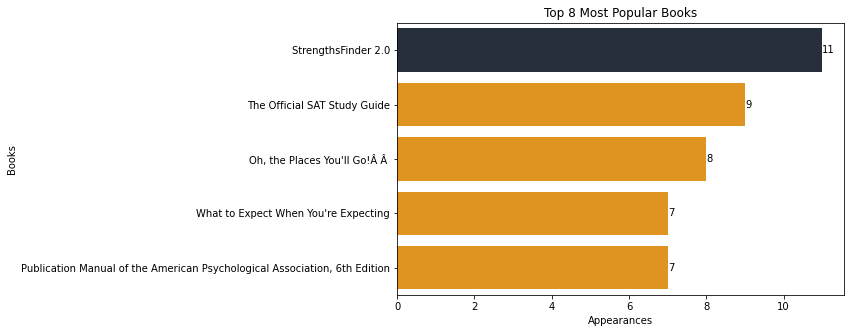

In [253]:
plt.rcParams['figure.figsize'] = (8, 5)

#set label sizes for axes, xtick and ytick
plt.rc('font', size=10)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)

colors = ['#232f3e', '#ff9900', '#ff9900', '#ff9900','#ff9900']
ax = sb.barplot(
    data = books.title.value_counts().head().reset_index(),
    y = 'index',
    x = 'title',
    palette=colors
)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('Appearances', fontsize=10)
plt.ylabel('Books', fontsize=10)

plt.title("Top 8 Most Popular Books", fontsize=12)
plt.show()

The horizontal bar chart above shows that of all 431 unique books reviewed, the most popular book overall was __StrengthsFinder 2.0__, which appeared __11__ times. This means that the book made the bestsellers' list _every single year_.

### What were the most popular authors overall?

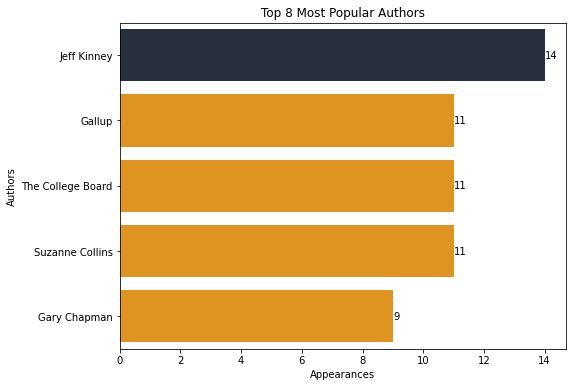

In [184]:
plt.figure(figsize=[8,6])
ax = sb.barplot(
    data = books.author.value_counts().head().reset_index(),
    y = 'index',
    x = 'author',
    palette=colors
)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('Appearances', fontsize=10)
plt.ylabel('Authors', fontsize=10)

plt.title("Top 8 Most Popular Authors", fontsize=12)
plt.show()

__Jeff Kinney__ was the author with the most entries across all the bestsellers' lists, with __14__. This was followed by Gallup (11), The College Board (11) and Suzanne Collins (11).

### What was the most popular genre overall?

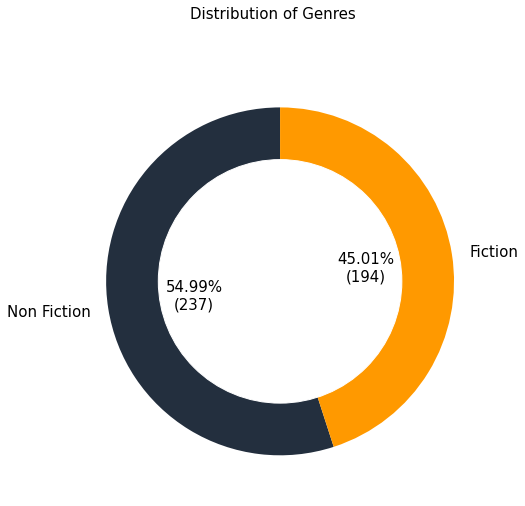

In [120]:
no_duplicate = books.drop_duplicates('title')
g_count = no_duplicate['genre'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

genre_col = ['#232f3e','#ff9900']

center_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(x=g_count.values, labels=g_count.index, autopct=make_autopct(g_count.values), 
          startangle=90, textprops={'size': 15}, pctdistance=0.5, colors=genre_col)
ax.add_artist(center_circle)

fig.suptitle('Distribution of Genres', fontsize=15)
fig.show()

The donut chart signifies that __Non-fiction__ was the more popular genre, making up __54.99% (237)__ of all books in the list.

### What were the most popular books by user ratings?

In [185]:
book_rating = pd.DataFrame(books.groupby('title')['average_rating'].mean().sort_values(ascending=False).iloc[:5].reset_index())
book_rating

,title,average_rating
0,The Food Lab: Better Home Cooking Through Science,4.9
1,Last Week Tonight with John Oliver Presents: A...,4.9
2,"Brown Bear, Brown Bear, What Do You See?",4.9
3,Little Blue Truck,4.9
4,Love You Forever,4.9


### What were the most popular authors by user ratings?

In [186]:
author_rating = pd.DataFrame(books.groupby('author')['average_rating'].mean().sort_values(ascending=False).iloc[:5].reset_index())
author_rating

,author,average_rating
0,Lin-Manuel Miranda,4.9
1,J. Kenji LÃ³pez-Alt,4.9
2,Emily Winfield Martin,4.9
3,Eric Carle,4.9
4,Sarah Young,4.9


The previous tables show that the book and author that received the highest average rating of 4.9 most often were __The Food Lab: Better Home Cooking Through Science__ and __Lin-Manuel Miranda__ respectively. 

### What was the distribution of popularity by genre for each year?

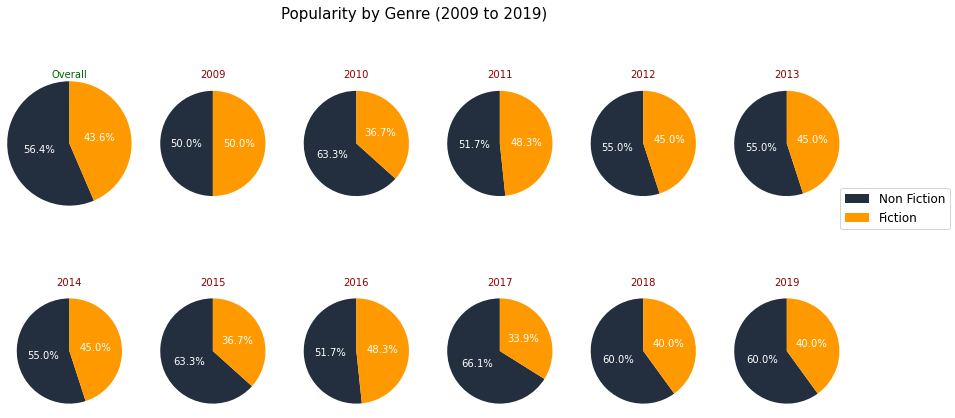

In [143]:
y1 = np.arange(2009, 2014)
y2 = np.arange(2014, 2020)
g_count = books['genre'].value_counts()

fig, ax = plt.subplots(2, 6, figsize=(15,7))

ax[0,0].pie(x=g_count.values, labels=None, autopct='%1.1f%%',
            startangle=90, textprops={'size': 10, 'color': 'white'},
            pctdistance=0.5, radius=1.3, colors=genre_col)
ax[0,0].set_title('Overall', color='darkgreen', fontdict={'fontsize': 10})

for i, year in enumerate(y1):
    counts = books[books['year'] == year]['genre'].value_counts()
    ax[0,i+1].set_title(year, color='darkred', fontdict={'fontsize': 10})
    ax[0,i+1].pie(x=counts.values, labels=None, autopct='%1.1f%%', 
                  startangle=90, textprops={'size': 10,'color': 'white'}, 
                  pctdistance=0.5, colors=genre_col, radius=1.1)

for i, year in enumerate(y2):
    counts = books[books['year'] == year]['genre'].value_counts()
    ax[1,i].pie(x=counts.values, labels=None, autopct='%1.1f%%', 
                startangle=90, textprops={'size': 10,'color': 'white'},
                pctdistance=0.5, colors=genre_col, radius=1.1)
    ax[1,i].set_title(year, color='darkred', fontdict={'fontsize': 10})

plt.suptitle('Popularity by Genre (2009 to 2019)',
             fontsize=15)
fig.legend(g_count.index, loc='center right', fontsize=12)
fig.show()

It is seen across the years that Non-fiction was the more popular genre. The outlier here is __2009__, where both genres were equally popular.

### What cover types appealed to readers?

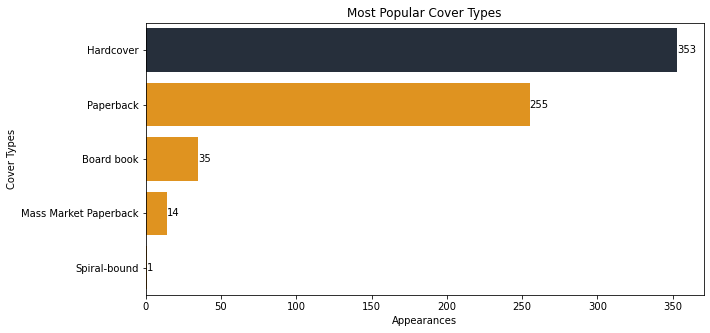

In [175]:
plt.figure(figsize=[10,5])
ax = sb.barplot(
    data = books.cover_type.value_counts().head().reset_index(),
    y = 'index',
    x = 'cover_type',
    palette=colors
)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('Appearances', fontsize=10)
plt.ylabel('Cover Types', fontsize=10)

plt.title("Most Popular Cover Types", fontsize=12)
plt.show()

The horizontal bar chart above shows that the most popular cover type overall was __Hardcover__, which was sold in __353__ books. This makes sense, as Hardcovers are generally more durable and protective than its closest type, Paperback.

### What were the most reviewed books and authors overall?

In [235]:
book_reviews = pd.DataFrame(books.groupby('title')['no_of_reviews'].mean().sort_values(ascending=False).iloc[:8].reset_index())
book_reviews

,title,no_of_reviews
0,Where the Crawdads Sing,429687.0
1,The Girl on the Train,335718.0
2,All the Light We Cannot See,212137.0
3,A Man Called Ove: A Novel,180537.5
4,The Martian,161434.0
5,Gone Girl,159869.0
6,The Fault in Our Stars,158118.0
7,Big Little Lies,152702.0


In [242]:
author_reviews = pd.DataFrame(books.groupby('author')['no_of_reviews'].sum().sort_values(ascending=False).iloc[:8].reset_index())
author_reviews

,author,no_of_reviews
0,Delia Owens,1289061
1,Suzanne Collins,726041
2,Paula Hawkins,671436
3,Don Miguel Ruiz,631704
4,Harper Lee,564139
5,John Green,555452
6,Paulo Coelho,546163
7,Dale Carnegie,523005


Text(0.5, 1.0, 'Most Reviewed Authors')

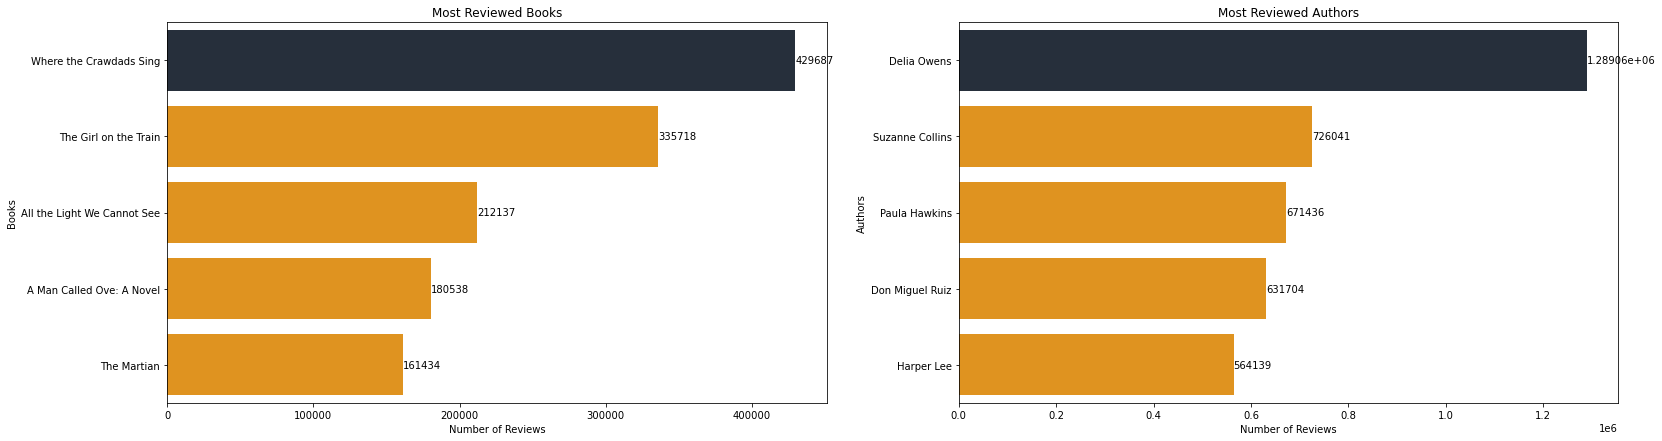

In [274]:
fig = plt.figure(figsize = [26,7])

plt.subplot(1,2,1)
ax = sb.barplot(
    data = book_reviews.head(),
    y = 'title',
    x = 'no_of_reviews',
    palette=colors
)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('Number of Reviews', fontsize=10)
plt.ylabel('Books', fontsize=10)

plt.title("Most Reviewed Books", fontsize=12)

plt.subplot(1,2,2)
ax1 = sb.barplot(
    data = author_reviews.head(),
    y = 'author',
    x = 'no_of_reviews',
    palette=colors
)

for i in ax1.containers:
    ax1.bar_label(i)

plt.xlabel('Number of Reviews', fontsize=10)
plt.ylabel('Authors', fontsize=10)

plt.title("Most Reviewed Authors", fontsize=12)

By far, __Where the Crawdads Sing__ was the most reviewed book, making its author, __Delia Owens__, the most reviewed author across all the years.

### What was the most reviewed genre in general?

In [248]:
genre_reviews = pd.DataFrame(books.groupby('genre')['no_of_reviews'].mean().sort_values(ascending=False).iloc[:8].reset_index())
genre_reviews

,genre,no_of_reviews
0,Fiction,48204.125436
1,Non Fiction,23484.620968


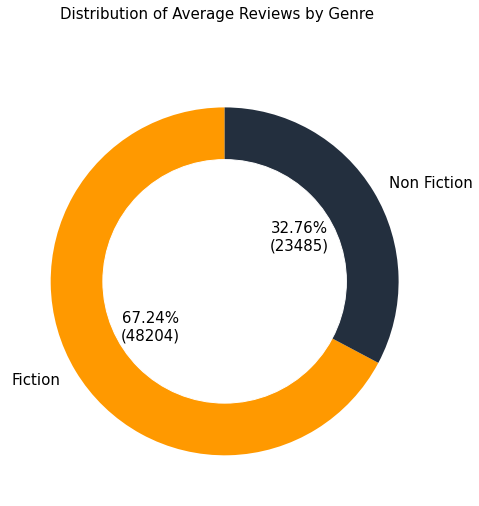

In [252]:
fig, ax = plt.subplots(figsize=(8, 8))
genre_col_r = ['#ff9900','#232f3e']

center_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(x=genre_reviews.no_of_reviews.unique().tolist(), labels=genre_reviews.genre, 
        autopct=make_autopct(genre_reviews.no_of_reviews.unique().tolist()), 
          startangle=90, textprops={'size': 15}, pctdistance=0.5, colors=genre_col_r)
ax.add_artist(center_circle)

fig.suptitle('Distribution of Average Reviews by Genre', fontsize=15)
fig.show()

We can see that although Non-fiction was the more popular genre by number of books in the overall list, __Fiction (67.24%)__ was the more popular genre by average number of reviews.

### What was the yearly average price of books?

In [160]:
avg_prices = pd.DataFrame(books.groupby('year')['price'].mean().sort_values())
avg_prices

,price
year,
2017,11.900508
2016,12.352833
2019,12.365000
2018,12.818667
2015,13.957500
2010,15.542333
2014,16.115500
2012,16.853333
2013,16.949167


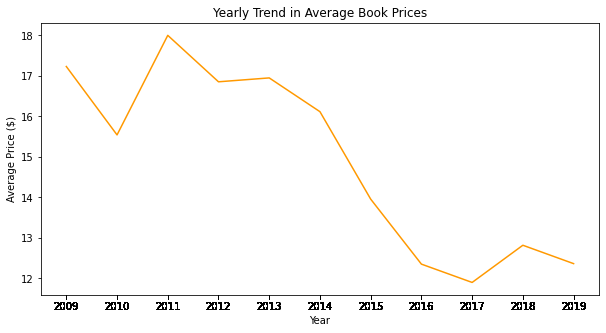

In [170]:
plt.figure(figsize=[10,5])
sb.lineplot(data = avg_prices, y = 'price', x = 'year', color='#ff9900')
plt.xticks(books['year']);
plt.xlabel('Year', fontsize=10)
plt.ylabel('Average Price ($)', fontsize=10)
plt.title("Yearly Trend in Average Book Prices", fontsize=12);

At a glance, it is seen that the average price of books in generally on a downward trend. In other words, books are generally becoming cheaper. 2011 had the highest average price compared to other years, though, which was nearly \\$18.

### What were the most popular books by genre?

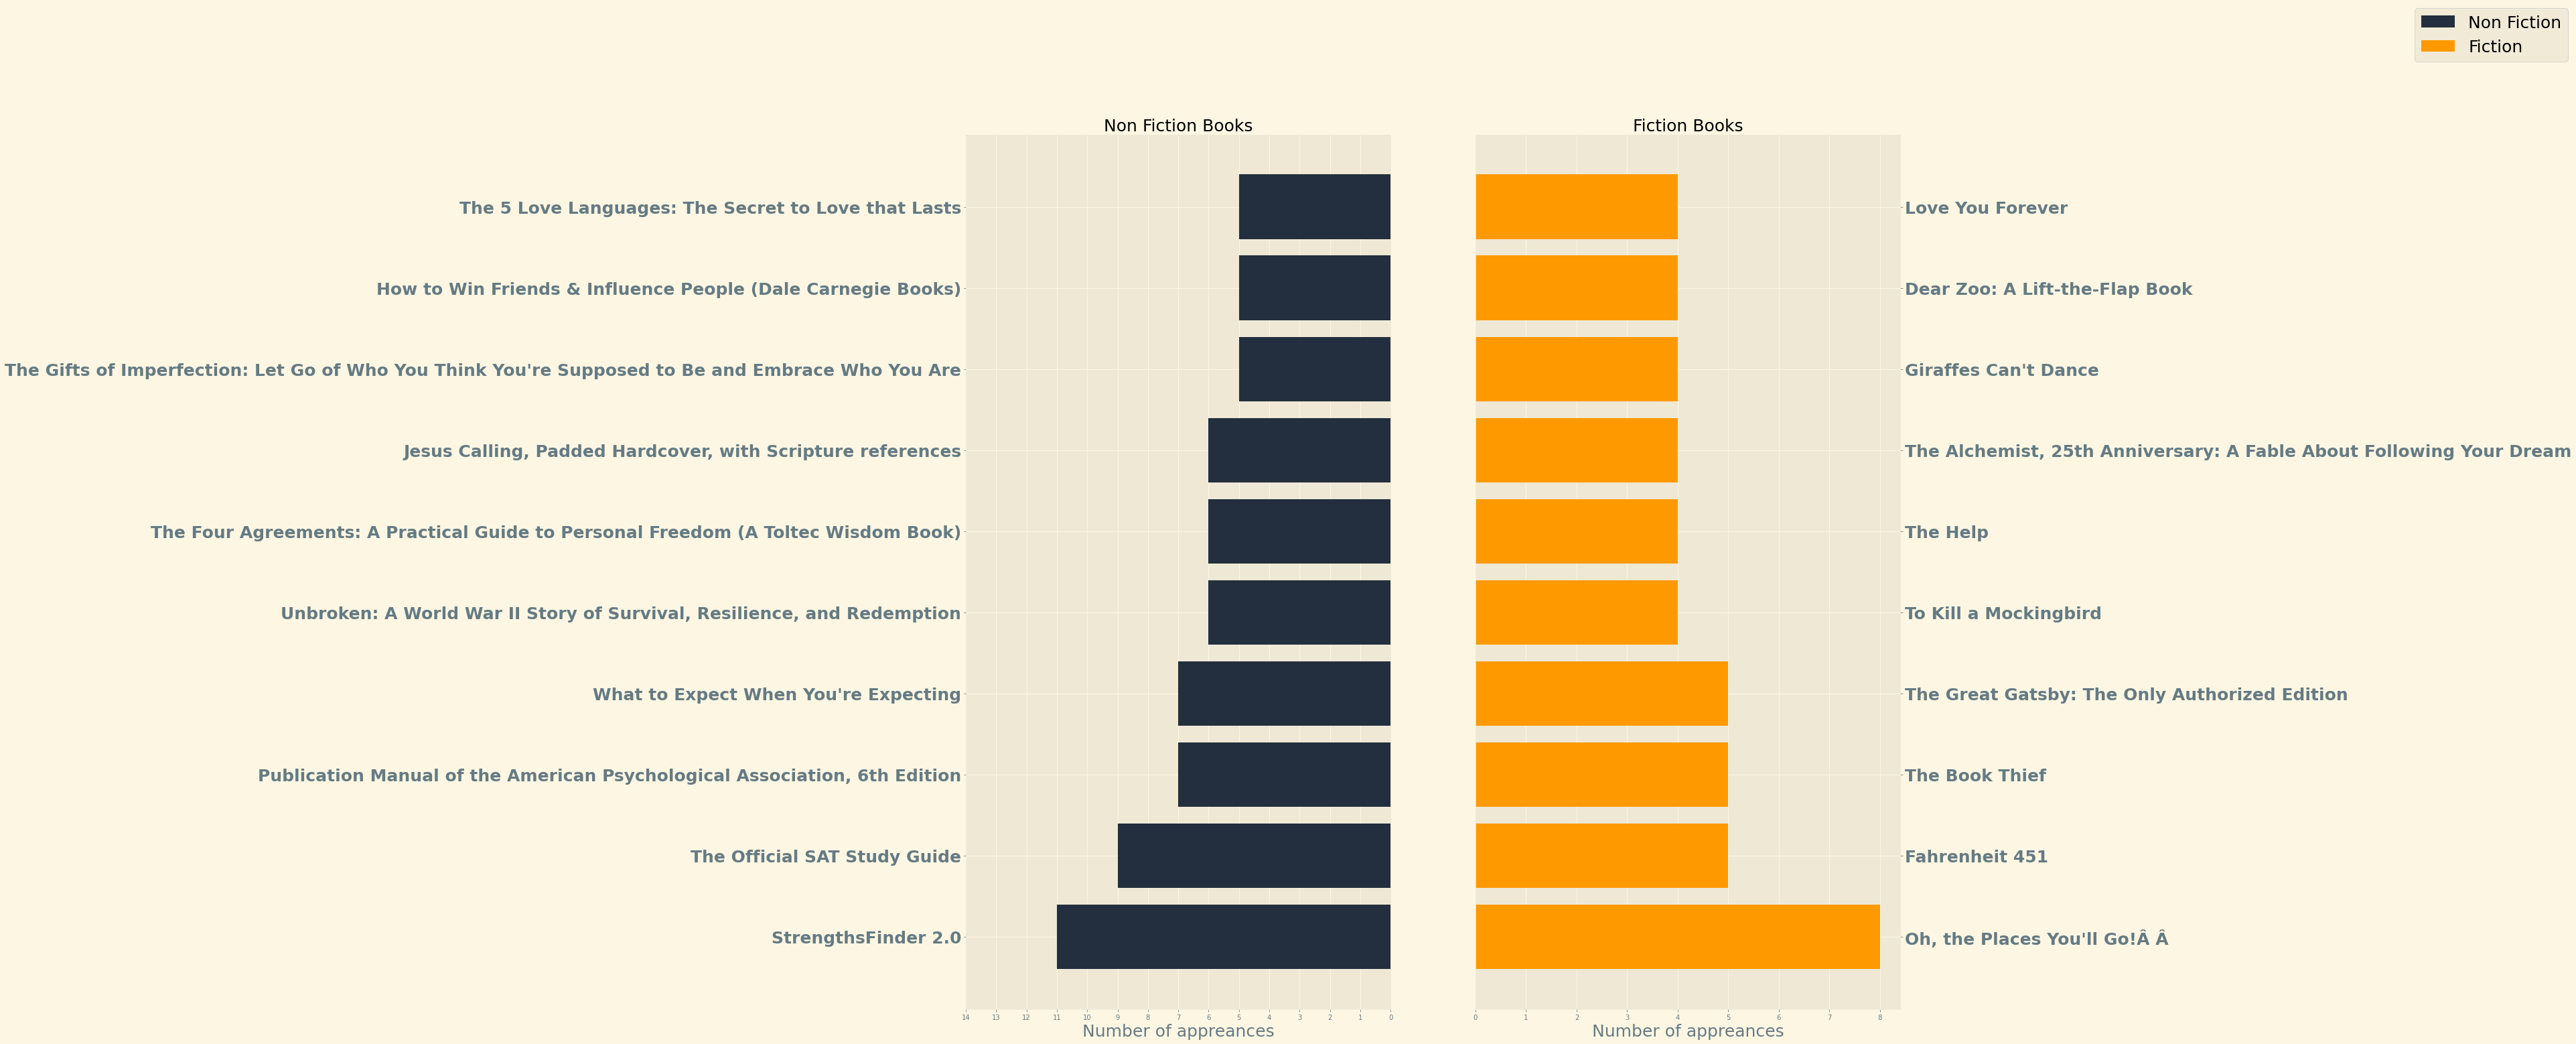

In [180]:
best_nf_books = books.groupby(['title', 'genre']).agg({'title': 'count'}).unstack()['title', 'Non Fiction'].sort_values(ascending=False)[:10]
best_f_books = books.groupby(['title', 'genre']).agg({'title': 'count'}).unstack()['title', 'Fiction'].sort_values(ascending=False)[:10]

with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1, 2, figsize=(25, 24))
    
    ax[0].barh(y=best_nf_books.index, width=best_nf_books.values,
           color=genre_col[0])
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[0].set_yticklabels(best_nf_books.index, fontsize=25, fontweight='semibold')
    ax[0].set_title('Non Fiction Books', fontsize=25)
    ax[0].set_xlabel('Number of appreances', fontsize=25)
    
    ax[1].barh(y=best_f_books.index, width=best_f_books.values,
           color=genre_col[1])
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(best_f_books.values)+1))
    ax[1].set_yticklabels(best_f_books.index, fontsize=25, fontweight='semibold')
    ax[1].set_title('Fiction Books', fontsize=25)
    ax[1].set_xlabel('Number of appreances', fontsize=25)
    
    fig.legend(['Non Fiction', 'Fiction'], fontsize=25)
    
plt.show()

In the _Non fiction_ genre, the 3 most popular books were __StrengthsFinder 2.0, The Official SAT Study Guide, and Publication Manual of the American Psychological Association__. Meanwhile, in the _Fiction_ genre, the 3 most popular books were __Oh, the Places You'll Go!, Fahrenheit 451, and The Book Thief__.

### What were the most popular authors by genre?

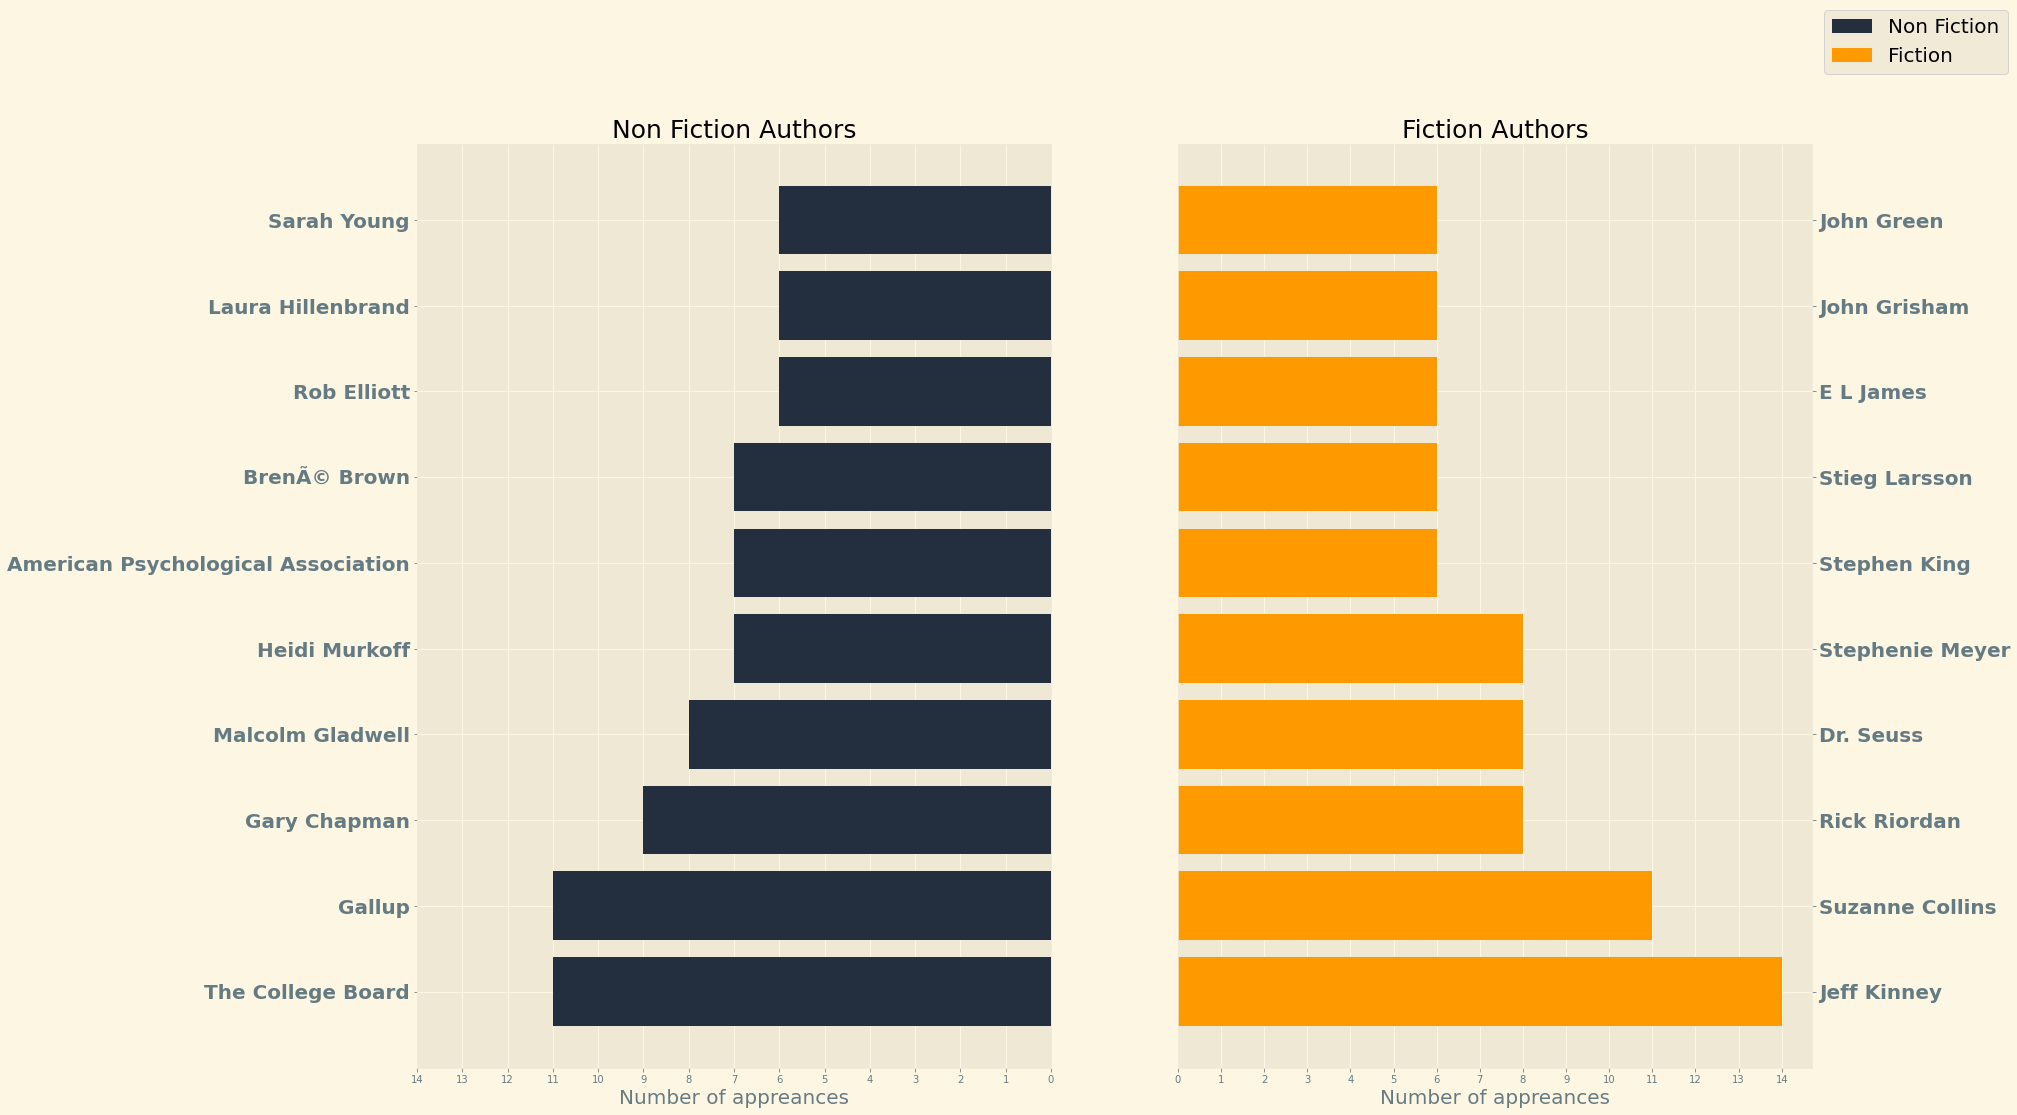

In [182]:
best_nf_authors = books.groupby(['author', 'genre']).agg({'title': 'count'}).unstack()['title', 'Non Fiction'].sort_values(ascending=False)[:10]
best_f_authors = books.groupby(['author', 'genre']).agg({'title': 'count'}).unstack()['title', 'Fiction'].sort_values(ascending=False)[:10]

with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1, 2, figsize=(25, 17))
    
    ax[0].barh(y=best_nf_authors.index, width=best_nf_authors.values,
           color=genre_col[0])
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[0].set_yticklabels(best_nf_authors.index, fontsize=20, fontweight='semibold')
    ax[0].set_title('Non Fiction Authors', fontsize=25)
    ax[0].set_xlabel('Number of appreances', fontsize=20)
    
    ax[1].barh(y=best_f_authors.index, width=best_f_authors.values,
           color=genre_col[1])
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[1].set_yticklabels(best_f_authors.index, fontsize=20, fontweight='semibold')
    ax[1].set_title('Fiction Authors', fontsize=25)
    ax[1].set_xlabel('Number of appreances', fontsize=20)
    
    fig.legend(['Non Fiction', 'Fiction'], fontsize=20)
    
plt.show()

In the _Non fiction_ genre, the 3 most popular authors were __The College Board, Gallup, and Gary Chapman__. Meanwhile, in the _Fiction_ genre, the 3 most popular books were __Jeff Kinney, Suzanne Collins, and Rick Riordan__.

### Word Cloud Representation of Books

In [258]:
popular_books = books.title.value_counts().reset_index()
popular_books.head(10)

,index,title
0,StrengthsFinder 2.0,11
1,The Official SAT Study Guide,9
2,"Oh, the Places You'll Go!Â Â",8
3,What to Expect When You're Expecting,7
4,Publication Manual of the American Psychologic...,7
5,"Unbroken: A World War II Story of Survival, Re...",6
6,The Four Agreements: A Practical Guide to Pers...,6
7,The Gifts of Imperfection: Let Go of Who You T...,6
8,The Great Gatsby: The Only Authorized Edition,6
9,"Jesus Calling, Padded Hardcover, with Scriptur...",6


In [259]:
popular_books.shape

(431, 2)

In [261]:
def clean_token(data):
    words = " ".join(data)
    tokens = word_tokenize(words)
    tokens = [t.lower() for t in tokens]
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    tokens = [t for t in tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return tokens

In [262]:
new_tokens = clean_token(popular_books['index'])
bag_of_words = " ".join(new_tokens)

In [264]:
mask = np.array(Image.open('/Users/netoa/Downloads/clipart605620.png'))

In [266]:
def orange_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(36, 100%%, %d%%)" % random.randint(50, 80)

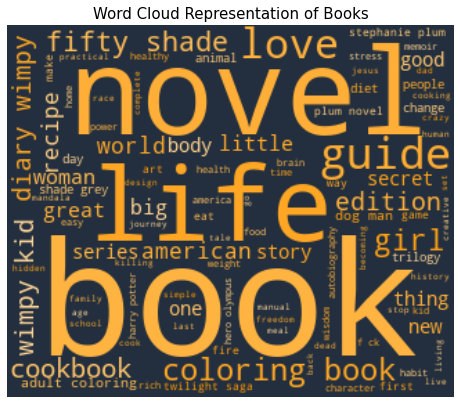

In [271]:
word_cloud = WordCloud(background_color='#232f3e', mask=mask, max_words=100)

# generate the word cloud
word_cloud.generate(bag_of_words)

# display the word cloud
plt.figure(figsize=[8,8], facecolor='none')


plt.imshow(word_cloud.recolor(color_func = orange_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud Representation of Books', fontsize=15);
plt.show()


__*As seen in the word cloud above, the words most used were Book, Novel, Life. We can also see Wimpy Kid, Coloring Book, guide and so on showing up clearly.*__

<a id='inferences'></a>
## Inferences
1. Of all 431 unique books reviewed, the most popular book overall was __StrengthsFinder 2.0__, which appeared __11__ times. This means that the book made the bestsellers' list _every single year_.
2. __Jeff Kinney__ was the author with the most entries across all the bestsellers' lists, with __14__. This was followed by Gallup (11), The College Board (11) and Suzanne Collins (11).
3. __Non-fiction__ was the more popular genre, making up __54.99% (237)__ of all books in the list.
4. The book and author that received the highest average rating of 4.9 most often were __The Food Lab: Better Home Cooking Through Science__ and __Lin-Manuel Miranda__ respectively. 
5. It is seen across the years that Non-fiction was the more popular genre. The outlier here is __2009__, where both genres were equally popular.
6. The most popular cover type overall was __Hardcover__, which was sold in __353__ books. This makes sense, as Hardcovers are generally more durable and protective than its closest type, Paperback.
7. __Where the Crawdads Sing__ was by far the most reviewed book, making its author, __Delia Owens__, the most reviewed author across all the years.
8. Although Non-fiction was the more popular genre by number of books in the overall list, __Fiction (67.24%)__ was the more popular genre by average number of reviews.
9. The average price of books in generally on a downward trend. In other words, books are generally becoming cheaper. 2011 had the highest average price compared to other years, though, which was nearly \\$18.
10. In the _Non fiction_ genre, the 3 most popular books were __StrengthsFinder 2.0, The Official SAT Study Guide, and Publication Manual of the American Psychological Association__. 
11. In the _Fiction_ genre, the 3 most popular books were __Oh, the Places You'll Go!, Fahrenheit 451, and The Book Thief__.
12. In the _Non fiction_ genre, the 3 most popular authors were __The College Board, Gallup, and Gary Chapman__. 
13. In the _Fiction_ genre, the 3 most popular books were __Jeff Kinney, Suzanne Collins, and Rick Riordan__.

<a id='conclusion'></a>
## Conclusion

I hope with this thorough review, you will be guided on finding your next read. You will also be able to know where to find ample reviews to guide your choice. Since I'm a fiction lover, I think I'll read __Where the Crawdads Sing__ next. 

What about you?


<a id='references'></a>
## References
1. https://reflect.run/articles/installing-chromedriver-and-python-selenium/
2. https://github.com/Chisomnwa/Amazon-Best-Selling-Books-Analysis
3. https://chromedriver.chromium.org/downloads
4. https://wordsrated.com/amazon-print-book-sales-statistics/#:~:text=U.S.%20publishers%20sold%20825.7%20million,million%20print%20books%20each%20year.
5. https://rgb.to/hex/ff9900